# LETSGROWMORE DATA SCIENCE INTERN TASK JUNE 2023

# TASK - 02 

# Stock Market Prediction And Forecasting Using Stacked LSTM

By Harish Nandhan S

Dataset link : https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LSTM
from sklearn.metrics import mean_squared_error

In [3]:
data_ref_link = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'

In [4]:
df= pd.read_csv(data_ref_link, parse_dates=True,)
df.reset_index()
df.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


In [5]:
df.sample(10) 
# Returns any 10 random data points from the dataset

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1856,2011-04-04,101.00,102.80,101.00,101.90,101.85,1054078,1075.45
710,2015-11-17,129.70,134.00,128.30,133.95,132.50,1152357,1523.05
75,2018-06-11,265.60,271.25,262.70,263.25,263.70,3538690,9470.30
568,2016-06-15,127.25,128.15,126.60,126.75,127.00,1662070,2116.66
1540,2012-07-09,115.00,117.85,113.65,114.25,114.15,1421548,1635.53
1481,2012-10-03,148.90,156.50,146.25,156.25,155.40,9645143,14680.57
1593,2012-04-25,118.65,119.40,115.30,116.70,116.65,1043981,1225.18
1846,2011-04-20,102.00,102.95,101.15,102.00,101.80,1089914,1110.57
1053,2014-06-24,167.45,169.50,165.50,167.00,167.30,4394262,7365.66
434,2016-12-29,119.60,122.15,119.60,121.30,121.10,1025503,1241.44


In [6]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [8]:
df.shape

(2035, 8)

In [10]:
df.isnull().sum()
# To check if there is any null value present in the dataset

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [11]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


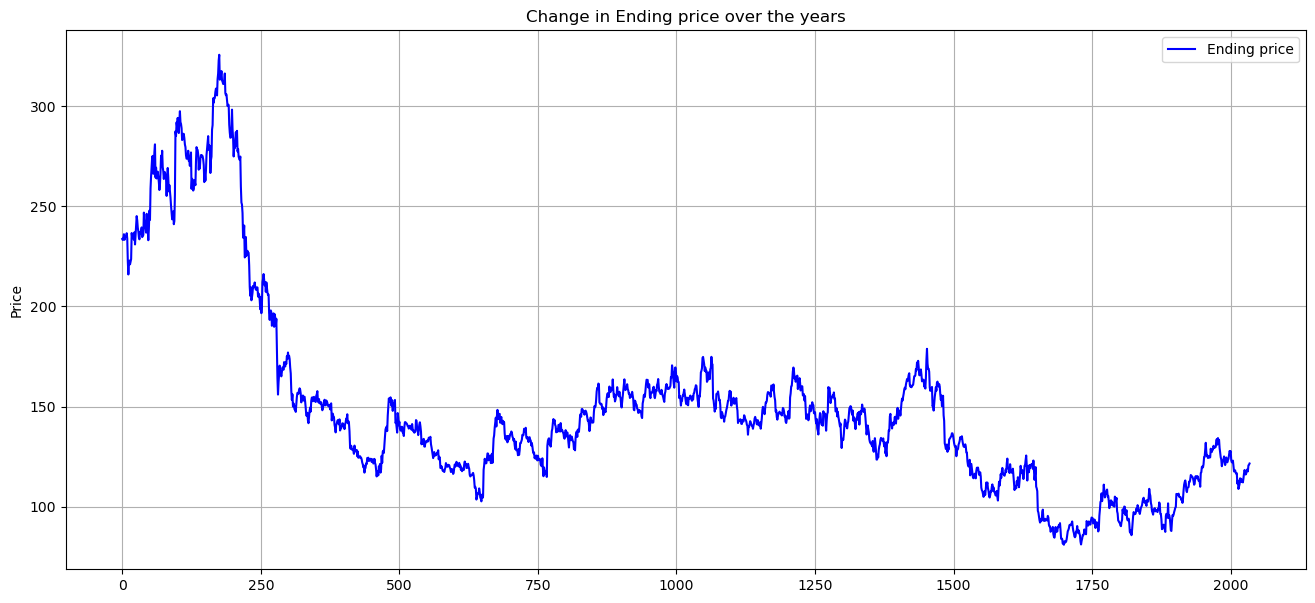

In [15]:
plt.figure(figsize=(10,6))
df['Close'].plot(kind='line',figsize=(16,7),color='b',label="Closing price")

plt.ylabel("Price")
plt.legend(loc="upper right")
plt.title("Change in Closing price over the years")
plt.grid()

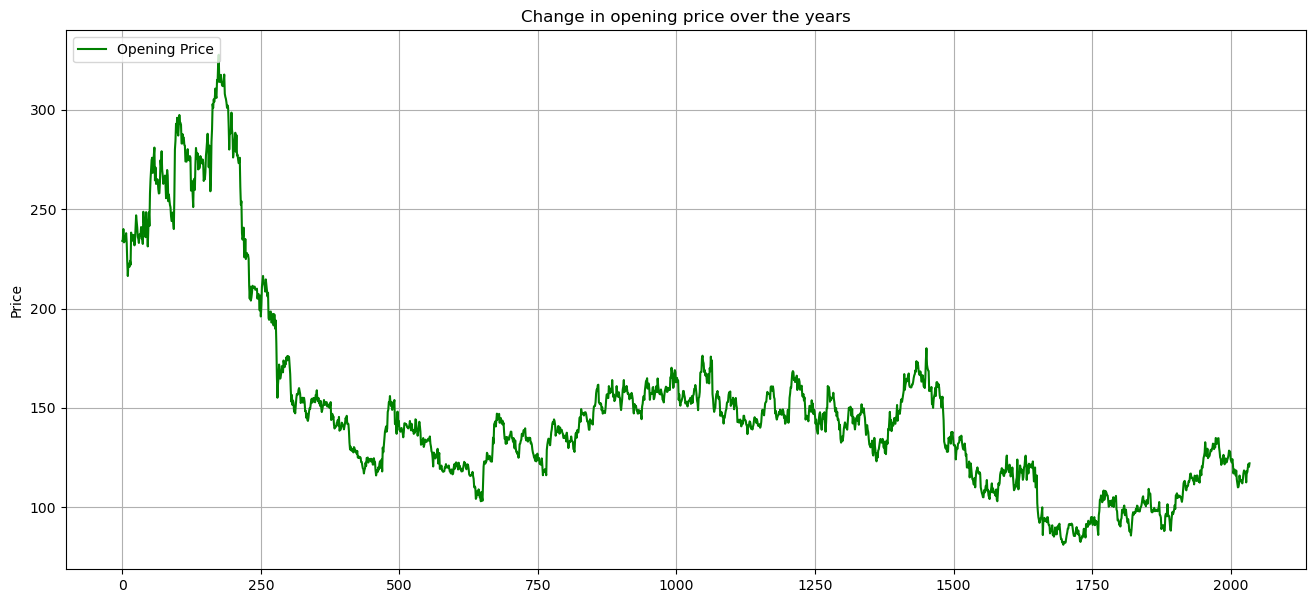

In [16]:
plt.figure(figsize=(10,6))
df['Open'].plot(kind='line',figsize=(16,7),color='g',label="Opening Price")

plt.ylabel("Price")
plt.legend(loc="upper left")
plt.title("Change in opening price over the years")
plt.grid()

In [17]:
df1=df.reset_index()['Close']
df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

<AxesSubplot:>

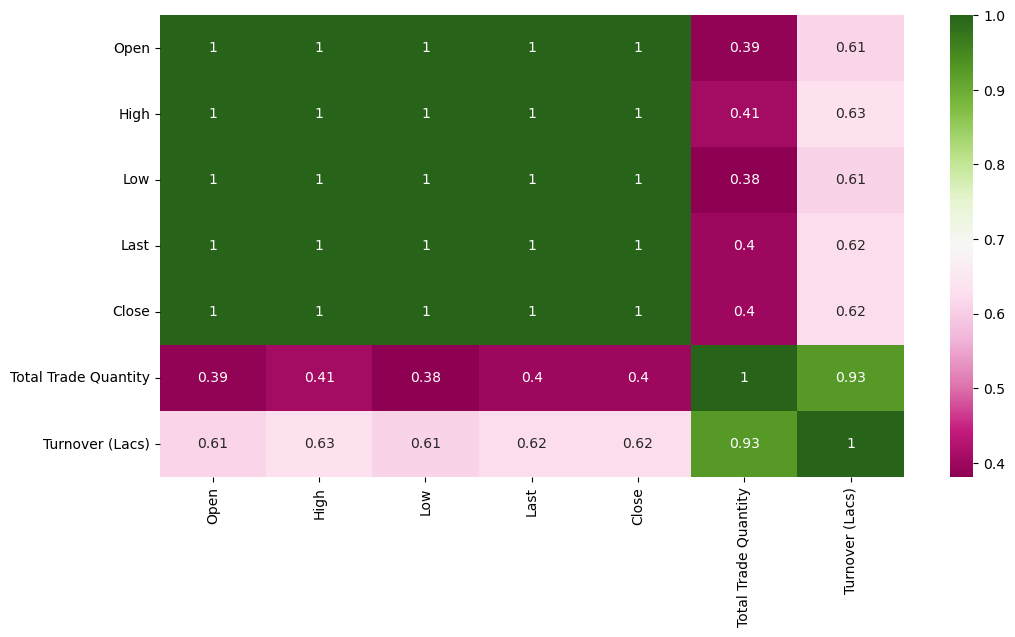

In [22]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='PiYG')

<AxesSubplot:ylabel='Turnover (Lacs)'>

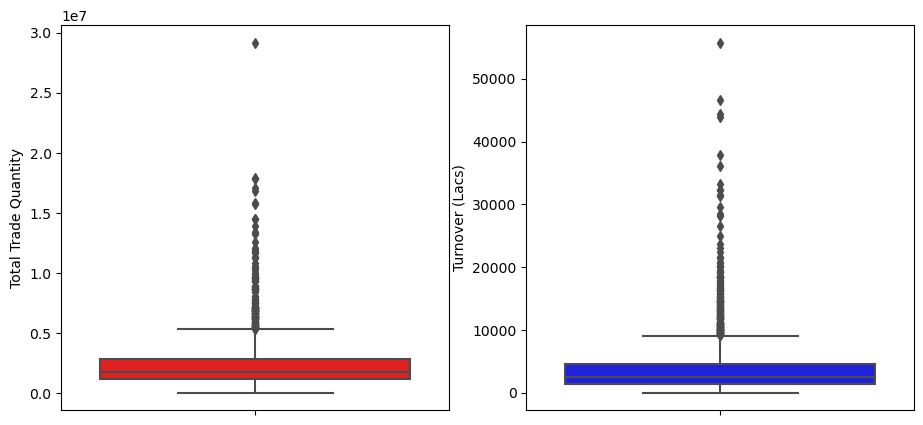

In [23]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
sns.boxplot(data=df,y='Total Trade Quantity',color='red')
plt.subplot(1,2,2)
sns.boxplot(data=df,y='Turnover (Lacs)',color='blue')

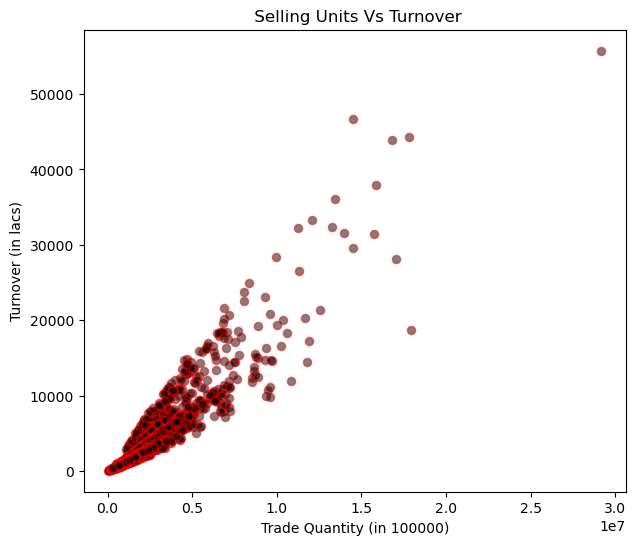

In [26]:
fig=plt.figure(figsize=(7,6))
plt.scatter(df['Total Trade Quantity'],df['Turnover (Lacs)'], alpha=0.5, edgecolor='r', color='black')
plt.xlabel("Trade Quantity (in 100000)")
plt.ylabel("Turnover (in lacs)")
plt.title(" Selling Units Vs Turnover")
plt.show()

<AxesSubplot:>

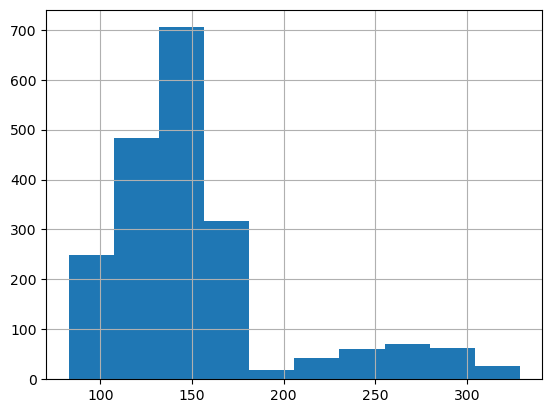

In [27]:
df['High'].hist()

<AxesSubplot:>

<Figure size 2000x800 with 0 Axes>

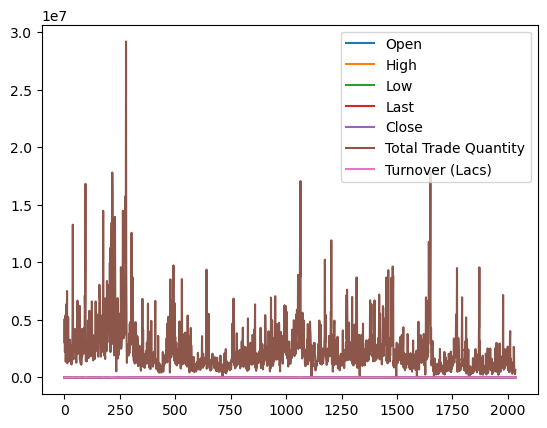

In [28]:
plt.figure(figsize=(20,8))
df.plot()

In [29]:
training_set= df[['Open']]
training_set=pd.DataFrame(training_set)
training_set

,Open
0,234.05
1,234.55
2,240.00
3,233.30
4,233.55
...,...
2030,117.60
2031,120.10
2032,121.80
2033,120.30


In [30]:
scaler=MinMaxScaler(feature_range=(0,1))
training_set_scaler=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [31]:
training_set_scaler

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [32]:
train_size1= int(len(training_set_scaler)*0.65)
test_size1=int(len(training_set_scaler))-train_size1
train_data1,test_data1=training_set_scaler[0:train_size1,:],training_set_scaler[train_size1:len(df), :1]

In [33]:
train_size1

1322

In [34]:
def create_dataset(dataset,time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [35]:
time_step=100
x_train, y_train=create_dataset(train_data1, time_step)
x_test, y_test= create_dataset(test_data1, time_step)


In [36]:
print(x_train.shape,y_train.shape)

(1221, 100) (1221,)


In [37]:
x_test.shape

(612, 100)

In [38]:
y_test.shape

(612,)

In [39]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [48]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adagrad', metrics='acc')

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64,verbose = 1)

Epoch 1/100
20/20 [==============================] - 18s 449ms/step - loss: 0.1021 - acc: 0.0000e+00 - val_loss: 0.0074 - val_acc: 0.0016
Epoch 2/100
20/20 [==============================] - 7s 350ms/step - loss: 0.0637 - acc: 0.0000e+00 - val_loss: 0.0067 - val_acc: 0.0016
Epoch 3/100
20/20 [==============================] - 7s 346ms/step - loss: 0.0458 - acc: 0.0000e+00 - val_loss: 0.0094 - val_acc: 0.0016
Epoch 4/100
20/20 [==============================] - 7s 366ms/step - loss: 0.0362 - acc: 0.0000e+00 - val_loss: 0.0134 - val_acc: 0.0016
Epoch 5/100
20/20 [==============================] - 7s 344ms/step - loss: 0.0302 - acc: 0.0000e+00 - val_loss: 0.0172 - val_acc: 0.0016
Epoch 6/100
20/20 [==============================] - 7s 345ms/step - loss: 0.0269 - acc: 0.0000e+00 - val_loss: 0.0201 - val_acc: 0.0016
Epoch 7/100
20/20 [==============================] - 7s 345ms/step - loss: 0.0250 - acc: 0.0000e+00 - val_loss: 0.0223 - val_acc: 0.0016
Epoch 8/100
20/20 [=====================

In [51]:
train_predict1=model.predict(x_train)
test_predict1=model.predict(x_test)

#Transform again to original form

train_predict1=scaler.inverse_transform(train_predict1)
test_predict1=scaler.inverse_transform(test_predict1)

20/20 [==============================] - 1s 68ms/step


In [52]:
math.sqrt(mean_squared_error(y_train,train_predict1))

165.04657126146287

In [53]:
math.sqrt(mean_squared_error(y_test,test_predict1))

115.6571270666443

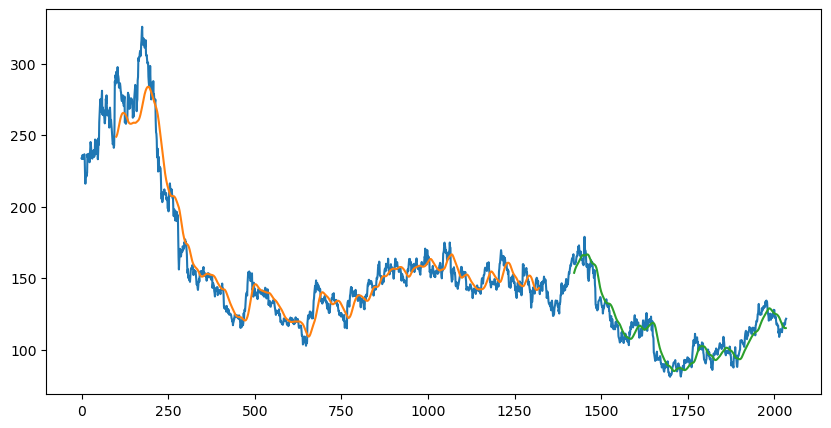

In [54]:
### Plotting 

# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(training_set_scaler)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict1)+look_back, :] = train_predict1

# shift test predictions for plotting
testPredictPlot = np.empty_like(training_set_scaler)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict1)+(look_back*2)+1:len(df1)-1, :] = test_predict1

# plot baseline and predictions
plt.figure(figsize=(10,5))
plt.plot(scaler.inverse_transform(training_set_scaler))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()